# <div>
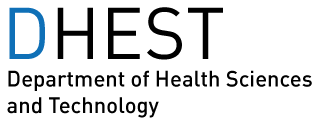
    <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQe1ZHapHvYNyrCLtdygLfLu92gN3ztZ64m9U8eNLeYE5BKY7r9wJiBgH7cnhZ7B269qw&usqp=CAU" width="300" align="left" style="display: inline;"/>
    <div ><h1 style="display: inline;"><br/>FoDS Group Project G5G </h1></div>

 </div>

 

The data used in this group project belongs to THE BIG CITIES HEALTH INVENTORY DATA PLATFORM which provides public health data from 35 large US-American cities. The dataset includes categories like infectious diseases (e.g. HIV/AIDS), chronic conditions (e.g. diabetes, cardiovascular), mental health. In addition, information on violence and crime, socio-economic factors and the built environment are available.

The goal of this group project is to create 4 Machine Learning Models that predict diabetes prevalence using the information on built-environment.
The following 4 ML models will be applied:
1. Linear Regression
2. Ridge Regression
3. Lasso Regression
4. **???????????????????????????????????????????????????????????????**

In a further step their performances will be evaluated, compared and visualized.

In [2]:
# Import packages that are needed
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

## 1- Getting familiar with the data: Data Exploration

In [3]:
data = pd.read_csv('../data/BigCitiesHealth.csv')
display(data)

,metric_item_label,metric_cat_label,metric_subcat_label,metric_item_label_subtitle,metric_cat_item_yaxis_label,metric_source_desc_label_fn,metric_source_desc_label_url_fn,geo_label_city,geo_label_state,geo_label_citystate,...,value_90_ci_low,value_90_ci_high,geo_strata_region,geo_strata_poverty,geo_strata_Population,geo_strata_PopDensity,geo_strata_Segregation,strata_race_label,strata_sex_label,strata_race_sex_label
0,COVID-19 Deaths,Infectious Diseases,Respiratory Infection,"Deaths from COVID-19 (per 100,000 population, ...","Per 100,000","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Dallas,TX,"Dallas, TX",...,NaN,NaN,South,Less poor cities (<20% poor),Largest (>1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),Hispanic,Male,Hispanic Male
1,COVID-19 Deaths,Infectious Diseases,Respiratory Infection,"Deaths from COVID-19 (per 100,000 population, ...","Per 100,000","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Fort Worth,TX,"Fort Worth, TX",...,NaN,NaN,South,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),Asian/PI,Male,Asian/PI Male
2,COVID-19 Deaths,Infectious Diseases,Respiratory Infection,"Deaths from COVID-19 (per 100,000 population, ...","Per 100,000","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,San Antonio,TX,"San Antonio, TX",...,NaN,NaN,South,Less poor cities (<20% poor),Largest (>1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),White,Male,White Male
3,COVID-19 Deaths,Infectious Diseases,Respiratory Infection,"Deaths from COVID-19 (per 100,000 population, ...","Per 100,000","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Chicago,IL,"Chicago, IL",...,NaN,NaN,Midwest,Less poor cities (<20% poor),Largest (>1.3 million),Highest pop. density (>10k per sq mi),Highly Segregated (50%+),Hispanic,Male,Hispanic Male
4,COVID-19 Deaths,Infectious Diseases,Respiratory Infection,"Deaths from COVID-19 (per 100,000 population, ...","Per 100,000","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Kansas City,MO,"Kansas City, MO",...,NaN,NaN,Midwest,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),Hispanic,Male,Hispanic Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148287,Premature Death,Life Expectancy and Deaths,Deaths,Years of potential life lost before age 75 (pe...,"Years per 100,000 population aged <75","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,New York City,NY,"New York City, NY",...,NaN,NaN,Northeast,Less poor cities (<20% poor),Largest (>1.3 million),Highest pop. density (>10k per sq mi),Highly Segregated (50%+),Hispanic,Both,NaN
148288,Premature Death,Life Expectancy and Deaths,Deaths,Years of potential life lost before age 75 (pe...,"Years per 100,000 population aged <75","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Milwaukee,WI,"Milwaukee, WI",...,NaN,NaN,Midwest,Poorest cities (20%+ poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),Hispanic,Both,NaN
148289,Premature Death,Life Expectancy and Deaths,Deaths,Years of potential life lost before age 75 (pe...,"Years per 100,000 population aged <75","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Houston,TX,"Houston, TX",...,NaN,NaN,South,Less poor cities (<20% poor),Largest (>1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),Asian/PI,Both,NaN
148290,Premature Death,Life Expectancy and Deaths,Deaths,Years of potential life lost before age 75 (pe...,"Years per 100,000 population aged <75","National Vital Statistics System (NVSS), Cente...",https://

In [4]:
data.iloc[:,[9,10,11,12,13,14,15,16,17,18,19,20,21,22]]

,geo_label_citystate,geo_fips_code,value,date_label,geo_label_proxy_or_real,geo_label_proxy_footnote,geo_fips_desc,date_label_proxy_or_real,date_label_proxy_footnote,value_ci_flag_yesno,value_95_ci_low,value_95_ci_high,value_90_ci_low,value_90_ci_high
0,"Dallas, TX",4819000.0,271.876868,2020,real,NaN,place,real,NaN,yes,240.233095,307.293299,NaN,NaN
1,"Fort Worth, TX",4827000.0,333.954685,2020,real,NaN,place,real,NaN,yes,161.906352,629.881493,NaN,NaN
2,"San Antonio, TX",4865000.0,85.391551,2020,real,NaN,place,real,NaN,yes,73.839052,98.550579,NaN,NaN
3,"Chicago, IL",1714000.0,354.585206,2020,real,NaN,place,real,NaN,yes,328.986597,382.175123,NaN,NaN
4,"Kansas City, MO",2938000.0,187.017704,2020,real,NaN,place,real,NaN,yes,104.928717,316.971329,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148287,"New York City, NY",3651000.0,5786.217877,2020,real,NaN,place,real,NaN,yes,5668.487295,5903.948459,NaN,NaN
148288,"Milwaukee, WI",5553000.0,7087.929743,2020,real,NaN,place,real,NaN,yes,6458.346917,7717.512570,NaN,NaN
148289,"Houston, TX",4835000.0,4099.348306,2011,real,NaN,place,real,NaN,yes,3723.288703,4475.407910,NaN,NaN
148290,"Milwaukee, WI",5553000.0,5706.528569,2014,real,NaN,place,real,NaN,yes,4594.357077,6818.700061,NaN,NaN


In [5]:
data.iloc[:,1].unique()

array(['Infectious Diseases', 'Chronic Health Conditions',
       'Physical and Built Environment', 'Life Expectancy and Deaths',
       'Access to Health Services', 'Maternal and Child Health',
       'Mental Health and Substance Use', 'Poisoning',
       'Violence and Injury', 'Social and Economic Factors',
       'Demographics'], dtype=object)

In [6]:
data.iloc[:,2].unique()

array(['Respiratory Infection', 'Diabetes and Obesity',
       'Active Transportation', 'Deaths', 'Life Expectancy at Birth',
       'Health Insurance', 'Oral Health', 'Births', 'Disability',
       'Respiratory Disease', 'Cancer', 'Cardiovascular Disease',
       'Physical Activity', 'Dietary Quality',
       'Sexually Transmitted Disease', 'Birth Control', 'Substance Use',
       'Mental Health', 'Lead Poisoning', 'Crime Incidents',
       'School Violence', 'Housing', 'Education', 'Income',
       'Income-related', 'Income Inequality',
       'Racial Segregation Indices', 'Food Access', 'Transportation',
       'Air Quality', 'Population', 'Race/Ethnicity',
       'Language and Nativity'], dtype=object)

In [7]:
data.iloc[:,3].unique()

array(['Deaths from COVID-19 (per 100,000 population, age-adjusted)',
       'Deaths from diabetes (per 100,000 population, age-adjusted)',
       'Percent of workers aged 16+ who walk to work',
       'Deaths from all causes (per 100,000 population, age-adjusted)',
       'Life expectancy at birth (years, age-adjusted, 5-year estimate)',
       'Percent of the population without health insurance',
       'Percent of children aged <19 without health insurance',
       'Percent of adults aged 18+ visited dentist or dental clinic in the past year',
       'Percent of births for which prenatal care began in the first trimester',
       'Percent of the population with a long-term disability of any kind',
       'Percent of high school students ever diagnosed with asthma',
       'Deaths from all types of cancer (per 100,000 population, age-adjusted)',
       'Deaths from breast cancer in females (per 100,000 population, age-adjusted)',
       'Deaths from lung cancer (per 100,000 populatio

## 2- Preprocessing the Data

In [8]:
# Preprocess our the Data that is relevant for prevalence of diabetes and the built-environment

# Define the relevant measurements for diabetes prevalence and built-environment:
diabetes_prevalence = 'Percent of adults aged  20+ with diabetes'
built_environment = 'Physical and Built Environment'

# Filter the dataframe for diabetes prevalence and built-environment:
relevant_data = data[np.logical_or(data['metric_item_label_subtitle'] == diabetes_prevalence, data['metric_cat_label'].isin([built_environment]))]

# Drop the irrelevant columns:
drop = ['metric_cat_item_yaxis_label', 'metric_source_desc_label_fn', 'metric_source_desc_label_url_fn', 'geo_label_city', 'geo_label_proxy_or_real', 'geo_label_proxy_footnote', 'geo_fips_desc', 'date_label_proxy_or_real', 'date_label_proxy_footnote', 'value_ci_flag_yesno', 'value_95_ci_low', 'value_95_ci_high', 'value_90_ci_low', 'value_90_ci_high', 'strata_race_sex_label']
relevant_data = relevant_data.drop(columns=drop)

# Handle Missing Data:
relevant_data.isna().sum()
# 105 tupels show to have missing values - considering the total sample of 6930, the deletion of those 105 is justified
relevant_data = relevant_data.dropna()

# Search for possible duplicated rows:
relevant_data.duplicated().sum()
# There are no duplicats

# Print the relevant Data:
display(relevant_data)

,metric_item_label,metric_cat_label,metric_subcat_label,metric_item_label_subtitle,geo_label_state,geo_label_citystate,geo_fips_code,value,date_label,geo_strata_region,geo_strata_poverty,geo_strata_Population,geo_strata_PopDensity,geo_strata_Segregation,strata_race_label,strata_sex_label
2933,Walking to Work,Physical and Built Environment,Active Transportation,Percent of workers aged 16+ who walk to work,NC,"Charlotte, NC",3712000.0,2.372121,2015,South,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),White,Both
4046,Walking to Work,Physical and Built Environment,Active Transportation,Percent of workers aged 16+ who walk to work,TX,"Houston, TX",4835000.0,3.884514,2016,South,Less poor cities (<20% poor),Largest (>1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),American Indian/Alaska Native,Both
9588,Walking to Work,Physical and Built Environment,Active Transportation,Percent of workers aged 16+ who walk to work,TX,"El Paso, TX",4824000.0,1.065039,2015,South,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),White,Both
15798,Walking to Work,Physical and Built Environment,Active Transportation,Percent of workers aged 16+ who walk to work,TX,"Houston, TX",4835000.0,1.833060,2015,South,Less poor cities (<20% poor),Largest (>1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),White,Both
20608,Walking to Work,Physical and Built Environment,Active Transportation,Percent of workers aged 16+ who walk to work,WA,"Seattle, WA",5363000.0,10.499727,2015,West,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),White,Both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137845,Hazardous Air Quality,Physical and Built Environment,Air Quality,Percent of days where the air quality was unhe...,TX,"Fort Worth, TX",4827000.0,3.561644,2017,South,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),All,Both
137846,Hazardous Air Quality,Physical and Built Environment,Air Quality,Percent of days where the air quality was unhe...,TX,"Houston, TX",4835000.0,5.479452,2017,South,Less poor cities (<20% poor),Largest (>1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),All,Both
137847,Hazardous Air Quality,Physical and Built Environment,Air Quality,Percent of days where the air quality was unhe...,TX,"El Paso, TX",4824000.0,6.301370,2017,South,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),All,Both
137848,Hazardous Air Quality,Physical and Built Environment,Air Quality,Percent of days where the air quality was unhe...,TX,"Dallas, TX",4819000.0,1.917808,2017,South,Less poor cities (<20% poor),Largest (>1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),All,Both


In [17]:
display(relevant_data.loc[relevant_data['metric_item_label_subtitle'] == diabetes_prevalence])
display(relevant_data.loc[relevant_data['metric_cat_label'] == built_environment])

,metric_item_label,metric_cat_label,metric_subcat_label,metric_item_label_subtitle,geo_label_state,geo_label_citystate,geo_fips_code,value,date_label,geo_strata_region,geo_strata_poverty,geo_strata_Population,geo_strata_PopDensity,geo_strata_Segregation,strata_race_label,strata_sex_label
43157,Diabetes,Chronic Health Conditions,Diabetes and Obesity,Percent of adults aged 20+ with diabetes,TX,"Austin, TX",4805000.0,7.7,2017,South,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),All,Both
43158,Diabetes,Chronic Health Conditions,Diabetes and Obesity,Percent of adults aged 20+ with diabetes,TN,"Memphis, TN",4748000.0,14.3,2017,South,Poorest cities (20%+ poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),All,Both
43159,Diabetes,Chronic Health Conditions,Diabetes and Obesity,Percent of adults aged 20+ with diabetes,OR,"Portland, OR",4159000.0,7.4,2017,West,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),All,Both
43160,Diabetes,Chronic Health Conditions,Diabetes and Obesity,Percent of adults aged 20+ with diabetes,OH,"Columbus, OH",3918000.0,10.2,2017,Midwest,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),All,Both
43161,Diabetes,Chronic Health Conditions,Diabetes and Obesity,Percent of adults aged 20+ with diabetes,NC,"Charlotte, NC",3712000.0,9.4,2017,South,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),All,Both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43547,Diabetes,Chronic Health Conditions,Diabetes and Obesity,Percent of adults aged 20+ with diabetes,CA,"San Diego, CA",666000.0,8.4,2018,West,Less poor cities (<20% poor),Largest (>1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),All,Both
43548,Diabetes,Chronic Health Conditions,Diabetes and Obesity,Percent of adults aged 20+ with diabetes,AZ,"Tucson, AZ",477000.0,10.1,2018,West,Poorest cities (20%+ poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),All,Both
43549,Diabetes,Chronic Health Conditions,Diabetes and Obesity,Percent of adults aged 20+ with diabetes,AZ,"Phoenix, AZ",455000.0,9.1,2018,West,Less poor cities (<20% poor),Largest (>1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),All,Both
43551,Diabetes,Chronic Health Conditions,Diabetes and Obesity,Percent of adults aged 20+ with diabetes,WA,"Seattle, WA",5363000.0,6.5,2017,West,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),All,Both


,metric_item_label,metric_cat_label,metric_subcat_label,metric_item_label_subtitle,geo_label_state,geo_label_citystate,geo_fips_code,value,date_label,geo_strata_region,geo_strata_poverty,geo_strata_Population,geo_strata_PopDensity,geo_strata_Segregation,strata_race_label,strata_sex_label
2933,Walking to Work,Physical and Built Environment,Active Transportation,Percent of workers aged 16+ who walk to work,NC,"Charlotte, NC",3712000.0,2.372121,2015,South,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),White,Both
4046,Walking to Work,Physical and Built Environment,Active Transportation,Percent of workers aged 16+ who walk to work,TX,"Houston, TX",4835000.0,3.884514,2016,South,Less poor cities (<20% poor),Largest (>1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),American Indian/Alaska Native,Both
9588,Walking to Work,Physical and Built Environment,Active Transportation,Percent of workers aged 16+ who walk to work,TX,"El Paso, TX",4824000.0,1.065039,2015,South,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),White,Both
15798,Walking to Work,Physical and Built Environment,Active Transportation,Percent of workers aged 16+ who walk to work,TX,"Houston, TX",4835000.0,1.833060,2015,South,Less poor cities (<20% poor),Largest (>1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),White,Both
20608,Walking to Work,Physical and Built Environment,Active Transportation,Percent of workers aged 16+ who walk to work,WA,"Seattle, WA",5363000.0,10.499727,2015,West,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),White,Both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137845,Hazardous Air Quality,Physical and Built Environment,Air Quality,Percent of days where the air quality was unhe...,TX,"Fort Worth, TX",4827000.0,3.561644,2017,South,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),All,Both
137846,Hazardous Air Quality,Physical and Built Environment,Air Quality,Percent of days where the air quality was unhe...,TX,"Houston, TX",4835000.0,5.479452,2017,South,Less poor cities (<20% poor),Largest (>1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),All,Both
137847,Hazardous Air Quality,Physical and Built Environment,Air Quality,Percent of days where the air quality was unhe...,TX,"El Paso, TX",4824000.0,6.301370,2017,South,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),All,Both
137848,Hazardous Air Quality,Physical and Built Environment,Air Quality,Percent of days where the air quality was unhe...,TX,"Dallas, TX",4819000.0,1.917808,2017,South,Less poor cities (<20% poor),Largest (>1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),All,Both


## 3- Machine Learing Models
### 3.1- Linear Regression

### 3.2- Ridge Regression

### 3.3- Lasso Regression

### 3.4- ONE MORE ML MODEL ?...?

## 4- Evaluation & comparison of  the ML models’ performance (visualisation of results)